In [5]:
# Loaded variable 'df' from URI: /data/jmharja/projects/PersonaClassifier/checkpoint/roberta-2024-12-12_11-33-20-all-best-result/performance.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'/data/jmharja/projects/PersonaClassifier/checkpoint/roberta-2024-12-12_11-33-20-all-best-result/performance.csv')
df = df.drop(['Unnamed: 0' ], axis=1)
df.columns

Index(['Model', 'Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score',
       'Specificity', 'False Positive Rate', 'Confusion Matrix'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


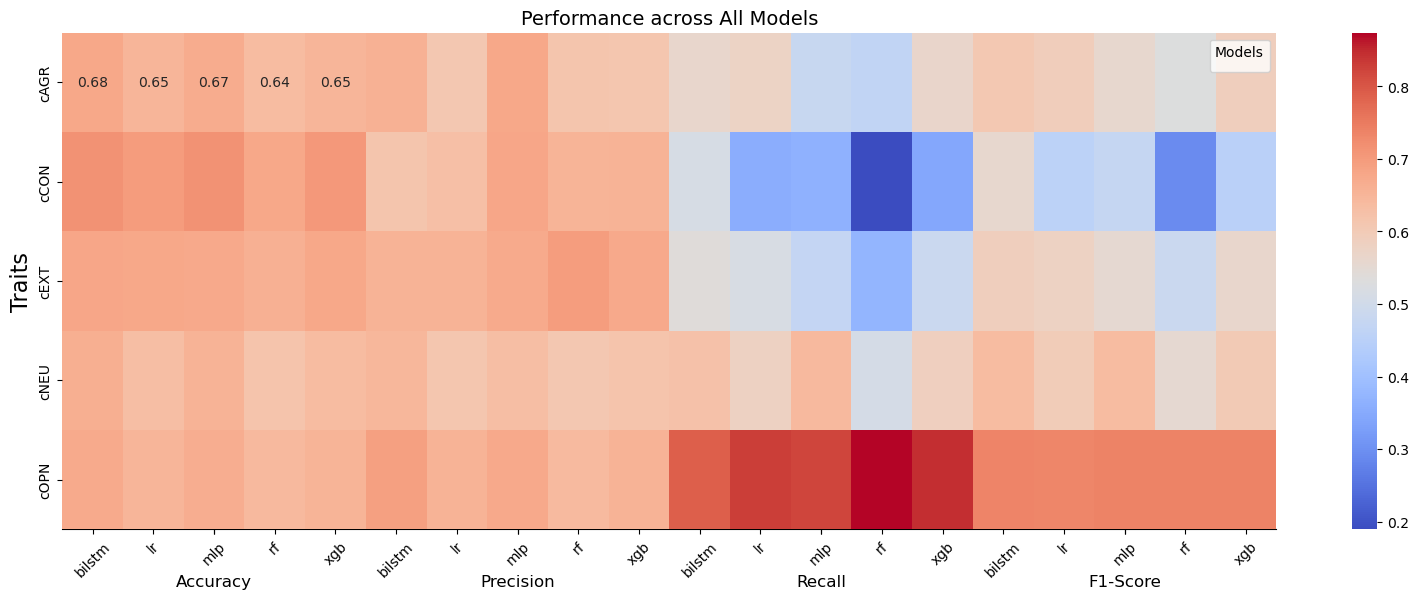

In [6]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
def get_newlabels(xlabels):
    mi = 0
    new_labels = []
    for i, item in enumerate(xlabels):
        item = item.get_text()
        if i % 5 == 0 and i!=0:
            mi = mi + 1
        metric = metrics[mi] 
        new_labels.append(item.split(f'{metric}-')[1])
        # print(item, mi, metric, item.split(f'{metric}-')[1])
    return new_labels

# Pivot to have models as columns
df_metrics = df[['Model', 'Classifier'] + metrics]
df_pivot = df_metrics.pivot(index='Classifier', columns='Model', values=metrics)

fig, axs = plt.subplots(figsize=(16, 6))
sns.heatmap(df_pivot, annot=True, cmap="coolwarm", fmt='.2f', cbar=True, ax=axs)
plt.title('Performance across All Models', fontsize=14)
plt.xlabel('', fontsize=6)
plt.ylabel('Traits', fontsize=16)
plt.xticks(rotation=45)  
axs.set_xticklabels(get_newlabels(axs.get_xticklabels()), rotation=45, fontsize=10)  

plt.legend(title='Models', fontsize=10)
plt.tight_layout()

sec = axs.secondary_xaxis(location=0)
sec.set_xticks([2.5, 7.5, 12.5, 17.5])  # Adjust these based on how many models you have
sec.set_xticklabels(['\n\nAccuracy', '\n\nPrecision', '\n\nRecall', '\n\nF1-Score'], fontsize=12)
# plt.savefig(f'checkpoint/roberta-2024-12-12_11-33-20-all-best-result/performance_heatmap.png')
plt.show()


In [58]:
20%3

2